### Will a Customer Accept the Coupon?

**Aim of the project**

The aim of this investigation is to determine if the customer will accept the coupon, based on the information provided. The data used comes from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. It includes a description of the various scenarios such as the destination, current time, number of passengers, marital status, income, etc and whether or not the customer accepted the coupon.

### Data Description
The data provided is divided into 3 attributes:

1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

## Analysis of the data

I decided to first analyze the data in general, identifying any trends and looking for any areas were further investigation is needed. In order to do this, I carried out the following steps:

1. Read in the `coupons.csv` file.



In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Drop the problematic data

In [5]:
data.dropna(subset = ['Bar', 'CoffeeHouse','CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

As shown, the column "car" has too many null values. As such, I decided to drop the whole column, in order to avoid any complications with the analysis of the data. 

In [6]:
data.drop(columns=['car'], axis=1)
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. Observe what proportion accepted the coupon



In [7]:
data['Y'].value_counts()

1    6877
0    5202
Name: Y, dtype: int64

As shown, there is a larger amount of customers (in general) who accepted the coupon

5. Visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

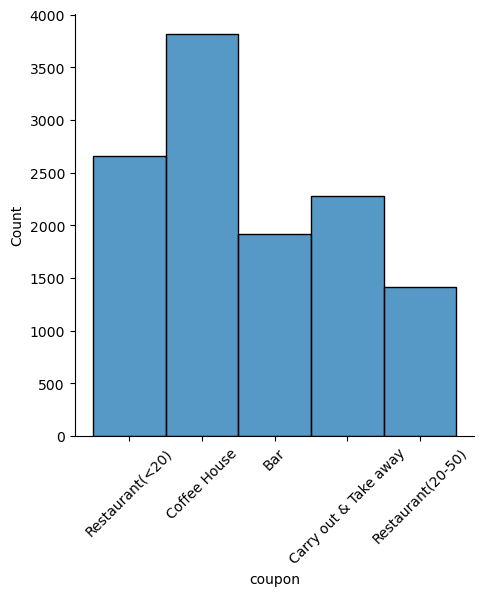

In [9]:
sns.displot(data=data['coupon'])
plt.xticks(rotation=45)

6. Visualize the temperature column.

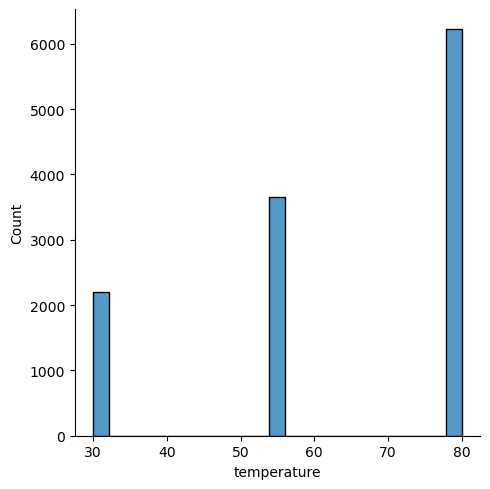

In [11]:
sns.displot(data=data['temperature'])

*General findings:*

As shown in the results and the plots, there is a larger number of customers who accepted the coupon. Furthermore, visits to the coffee house and cheap restaurants seem to have the highest acceptance rate. There is also a clear positive correlation between the temperature and the number of coupons accepted. 

#### Investigating the bar coupons

First, I decided to analyze the data provided for the customers who go to bars and accept the coupons. Also, I investigated through data analysis techniques, how the results vary depending on different factors such as age, marital status and number of passengers. In order to do this, I executed the following steps:

1. Create a data frame with only the bar coupons


In [293]:
bar_coupons=pd.DataFrame(data['Bar'])
bar_coupons.head(5)

,Bar
22,never
23,never
24,never
25,never
26,never


2. Investigate the  proportion of bar coupons that were accepted


In [352]:
less_1=data.query('Bar == "less1" and Y==1')
l1=len(less_1)
b1and3=data.query('Bar == "1~3" and Y==1')
l2=len(b1and3)
b4and8=data.query('Bar == "4~8" and Y==1')
l3=len(b4and8)
gt_8=data.query('Bar == "gt8" and Y==1')
l4=len(gt_8)
never=data.query('Bar == "never" and Y==1')
l5=len(never)

coupons_accepted=l1+l2+l3+l4+l5
print(coupons_accepted)

6877


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The number of bar coupons accepted for less than 1 visit is: 1929
The number of bar coupons accepted for visits between 1 and 3 times is: 1481
The number of bar coupons accepted for visits between 4 and 8 times is: 672
The number of bar coupons accepted for more than 8 visits is: 186
                                                                            
Acceptance rate for those who went to a bar less than 1 time is: 0.28050021811836556
Acceptance rate for those who went to a bar between 1 and 3 times is: 0.2153555329358732
Acceptance rate for those who went to a bar between 4 and 8 times is: 0.09771702777373854
Acceptance rate for those who went to a bar more than 8 times is: 0.027046677330231205


<Axes: title={'center': 'Acceptance rate comparison'}, xlabel='Number of times'>

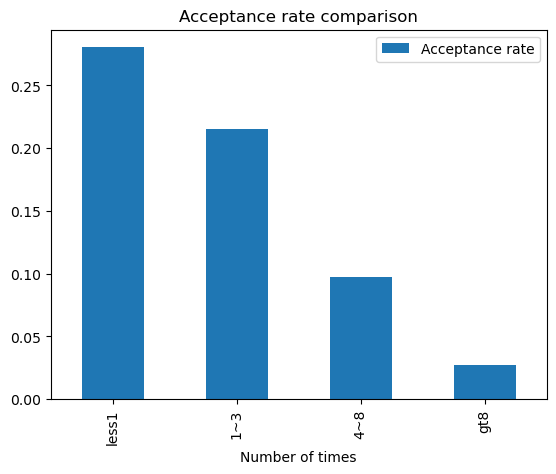

In [379]:
less1_yes=data.query('Bar == "less1" and Y==1')
one_and_three=data.query('Bar == "1~3" and Y==1')
four_and_eight=data.query('Bar == "4~8" and Y==1')
g_t8=data.query('Bar == "gt8" and Y==1')

fewer1=len(less1_yes)
fewer2=len(one_and_three)
more1=len(four_and_eight)
more2=len(g_t8)

acceptance_rate_less1=len(less1_yes)/6877
acceptance_rate_one_and_three=len(one_and_three)/6877
acceptance_rate_four_and_eight=len(four_and_eight)/6877
acceptance_rate_gt8=len(g_t8)/6877

print('The number of bar coupons accepted for less than 1 visit is: ' + str(fewer1))
print('The number of bar coupons accepted for visits between 1 and 3 times is: ' + str(fewer2))
print('The number of bar coupons accepted for visits between 4 and 8 times is: ' + str(more1))
print('The number of bar coupons accepted for more than 8 visits is: ' + str(more2))
print('                                                                            ')
print('Acceptance rate for those who went to a bar less than 1 time is: ' + str(acceptance_rate_less1))
print('Acceptance rate for those who went to a bar between 1 and 3 times is: ' + str(acceptance_rate_one_and_three))
print('Acceptance rate for those who went to a bar between 4 and 8 times is: ' + str(acceptance_rate_four_and_eight))
print('Acceptance rate for those who went to a bar more than 8 times is: ' + str(acceptance_rate_gt8))

compare=pd.DataFrame({
    'Number of times': ['less1', '1~3', '4~8', 'gt8'],
    'Acceptance rate': [acceptance_rate_less1, acceptance_rate_one_and_three,acceptance_rate_four_and_eight,acceptance_rate_gt8]})

compare.plot(x="Number of times", y="Acceptance rate", kind="bar", title="Acceptance rate comparison")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The acceptance rate for those who went to a bar more than 1 time and are over the age of 25 is: 0.34011923803984295


<Axes: title={'center': 'Acceptance rate comparison'}, xlabel='Number of times'>

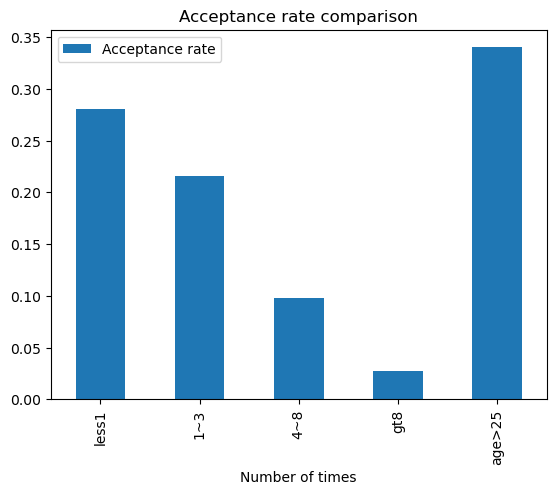

In [380]:
b1=data.query('Bar == "1~3" and age> "25" and Y==1')
leng1=len(b1and3)
b2=data.query('Bar == "4~8" and age> "25" and Y==1')
leng2=len(b4and8)
b3=data.query('Bar == "gt8" and age> "25" and Y==1')
leng3=len(gt_8)
coupons_accepted_more_than_once=leng1+leng2+leng3

acceptance_rate_more_than_once=coupons_accepted_more_than_once/6877

print('The acceptance rate for those who went to a bar more than 1 time and are over the age of 25 is: ' + str(acceptance_rate_more_than_once))

compare=pd.DataFrame({
    'Number of times': ['less1', '1~3', '4~8', 'gt8', 'age>25'],
    'Acceptance rate': [acceptance_rate_less1, acceptance_rate_one_and_three,acceptance_rate_four_and_eight,acceptance_rate_gt8,acceptance_rate_more_than_once]})

compare.plot(x="Number of times", y="Acceptance rate", kind="bar", title="Acceptance rate comparison")


5. Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<Axes: title={'center': 'Acceptance rate comparison'}, xlabel='Drivers'>

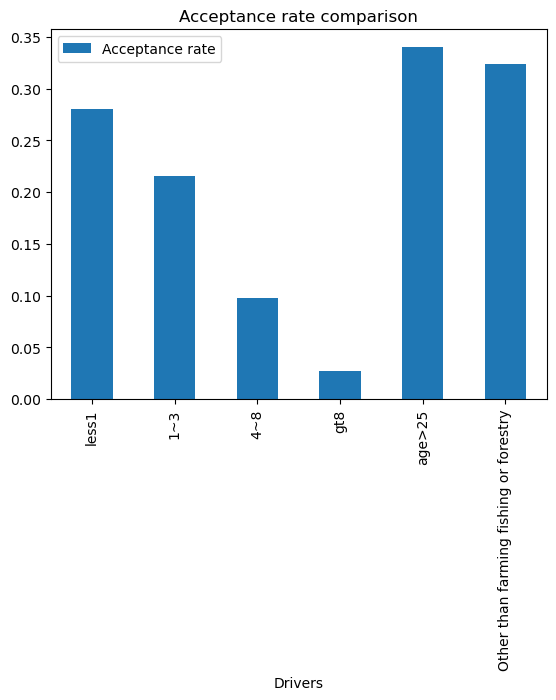

In [381]:

b4=data.query('Bar == "1~3" and Y==1 and (passanger=="Alone" or passanger== "Partner" or passanger== "Friend(s)") and (occupation != "Farming Fishing & Forestry" and Y==1)')
leng4=len(b4)
b5=data.query('Bar == "4~8" and Y==1 and (passanger=="Alone" or passanger== "Partner" or passanger== "Friend(s)") and (occupation != "Farming Fishing & Forestry"and Y==1)')
leng5=len(b5)
b6=data.query('Bar == "gt8" and Y==1 and (passanger=="Alone" or passanger== "Partner" or passanger== "Friend(s)") and (occupation != "Farming Fishing & Forestry"and Y==1)')
leng6=len(b6)


coupons_accepted_2=(leng4+leng5+leng6)/6877

compare2=pd.DataFrame({
    'Drivers': ['less1', '1~3', '4~8', 'gt8', 'age>25', 'Other than farming fishing or forestry'],
    'Acceptance rate': [acceptance_rate_less1, acceptance_rate_one_and_three,acceptance_rate_four_and_eight,acceptance_rate_gt8,acceptance_rate_more_than_once,coupons_accepted_2 ]})

compare2.plot(x='Drivers', y="Acceptance rate", kind="bar", title="Acceptance rate comparison")



6. Compare the acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 




<Axes: title={'center': 'Acceptance rate comparison'}, xlabel='Drivers'>

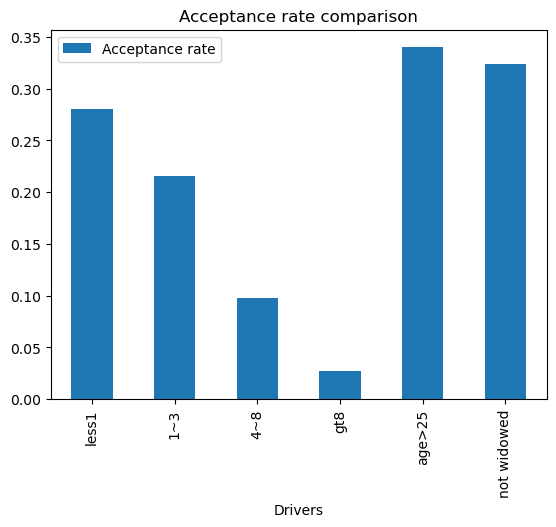

In [382]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed


b8=data.query('Bar == "1~3" and Y==1 and (passanger=="Alone" or passanger== "Partner" or passanger== "Friend(s)") and (maritalStatus=="Married partner" or maritalStatus=="Single" or maritalStatus=="Unmarried partner" or maritalStatus=="Divorced" and Y==1) ')
leng8=len(b8)
b9=data.query('Bar == "4~8" and Y==1 and (passanger=="Alone" or passanger== "Partner" or passanger== "Friend(s)") and (maritalStatus=="Married partner" or maritalStatus=="Single" or maritalStatus=="Unmarried partner" or maritalStatus=="Divorced" and Y==1) ')
leng9=len(b9)
b10=data.query('Bar == "gt8" and Y==1 and (passanger=="Alone" or passanger== "Partner" or passanger== "Friend(s)") and (maritalStatus=="Married partner" or maritalStatus=="Single" or maritalStatus=="Unmarried partner" or maritalStatus=="Divorced" and Y==1) ')
leng10=len(b10)

coupons_accepted_3=(leng8+leng9+leng10)/6877

compare3=pd.DataFrame({
    'Drivers': ['less1', '1~3', '4~8', 'gt8', 'age>25', 'not widowed'],
    'Acceptance rate': [acceptance_rate_less1, acceptance_rate_one_and_three,acceptance_rate_four_and_eight,acceptance_rate_gt8,acceptance_rate_more_than_once, coupons_accepted_3 ]})

compare3.plot(x='Drivers', y="Acceptance rate", kind="bar", title="Acceptance rate comparison")




#### Observations

From the results, there are a few things that can be hypothesized. First, there is a higher acceptance rate when the customer visits the bar less times per month. This makes sense, since the customer can see the coupon as an opportunity to explore more about that specific place. 

Furthermore, the highest acceptance rate belongs to the group of people who are older than 25. This is also expected, as more mature and responsible people are more likely to save or use the coupon. 

Lastly, the group of people that go to bars more than once a month, had passengers that were not a kid, and were not widowed also contribute to the highest acceptance rate. 


### Investigtion of cheaper restaurants

Furthermore, I decided to conduct an investigation of the coupons accepted for cheaper restaurants, taking into consideration the following variables: Passengers, Education Level and Income. In order to do this, I executed the following steps: 
 
 1. Inspect the cheaper restaurants column

In [349]:
#RestaurantLessThan20

data['RestaurantLessThan20'].value_counts()

1~3      5163
4~8      3450
less1    2005
gt8      1285
never     176
Name: RestaurantLessThan20, dtype: int64

2. Investigate the proportion of cheaper restaurant coupons that were accepted

In [358]:
#Number of coupons accepted
R1=data.query('RestaurantLessThan20 == "1~3" and Y==1')
re1=len(R1)
R2=data.query('RestaurantLessThan20 == "4~8" and Y==1')
re2=len(R2)
R3=data.query('RestaurantLessThan20 == "less1" and Y==1')
re3=len(R3)
R4=data.query('RestaurantLessThan20 == "gt8" and Y==1')
re4=len(R4)
R5=data.query('RestaurantLessThan20 == "never" and Y==1')
re5=len(R5)

coupons_accept=re1+re2+re3+re4+re5
coupons_accept


6877

3. Compare the coupon acceptance rate based on the type of passanger

<Axes: title={'center': 'Acceptance rate comparison'}, xlabel='Passangers'>

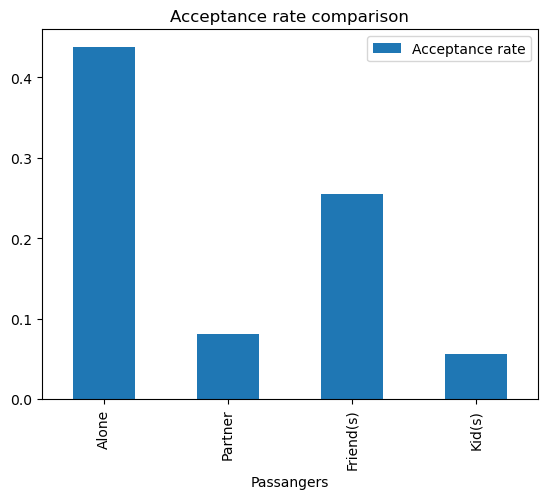

In [383]:
#Type of passangers
c1=data.query('RestaurantLessThan20 == "1~3" and Y==1 and passanger=="Alone"')
lengc1=len(c1)
c2=data.query('RestaurantLessThan20 == "4~8" and Y==1 and passanger=="Alone"')
lengc2=len(c2)
c3=data.query('RestaurantLessThan20 == "gt8" and Y==1 and passanger=="Alone"')
lengc3=len(c3)
coupons_accepted_c1=(lengc1+lengc2+lengc3)/6877

c4=data.query('RestaurantLessThan20 == "1~3" and Y==1 and passanger=="Partner"')
lengc4=len(c4)
c5=data.query('RestaurantLessThan20 == "4~8" and Y==1 and passanger=="Partner"')
lengc5=len(c5)
c6=data.query('RestaurantLessThan20 == "gt8" and Y==1 and passanger=="Partner"')
lengc6=len(c6)
coupons_accepted_c2=(lengc4+lengc5+lengc6)/6877

c7=data.query('RestaurantLessThan20 == "1~3" and Y==1 and passanger=="Friend(s)"')
lengc7=len(c7)
c8=data.query('RestaurantLessThan20 == "4~8" and Y==1 and passanger=="Friend(s)"')
lengc8=len(c8)
c9=data.query('RestaurantLessThan20 == "gt8" and Y==1 and passanger=="Friend(s)"')
lengc9=len(c9)
coupons_accepted_c3=(lengc7+lengc8+lengc9)/6877

c10=data.query('RestaurantLessThan20 == "1~3" and Y==1 and passanger=="Kid(s)"')
lengc10=len(c10)
c11=data.query('RestaurantLessThan20 == "4~8" and Y==1 and passanger=="Kid(s)"')
lengc11=len(c11)
c12=data.query('RestaurantLessThan20 == "gt8" and Y==1 and passanger=="Kid(s)"')
lengc12=len(c12)
coupons_accepted_c4=(lengc10+lengc11+lengc12)/6877

compare2=pd.DataFrame({
    'Passangers': ['Alone', 'Partner', 'Friend(s)', 'Kid(s)'],
    'Acceptance rate': [coupons_accepted_c1, coupons_accepted_c2, coupons_accepted_c3, coupons_accepted_c4]})

compare2.plot(x="Passangers", y="Acceptance rate", kind="bar", title="Acceptance rate comparison")



4. Inspect the education column

In [365]:
data['education'].value_counts()

Some college - no degree                  4219
Bachelors degree                          4021
Graduate degree (Masters or Doctorate)    1808
Associates degree                         1066
High School Graduate                       877
Some High School                            88
Name: education, dtype: int64

5. Compare the coupon acceptance rate based on the education level of the customer

<Axes: title={'center': 'Acceptance rate education comparison'}, xlabel='Education'>

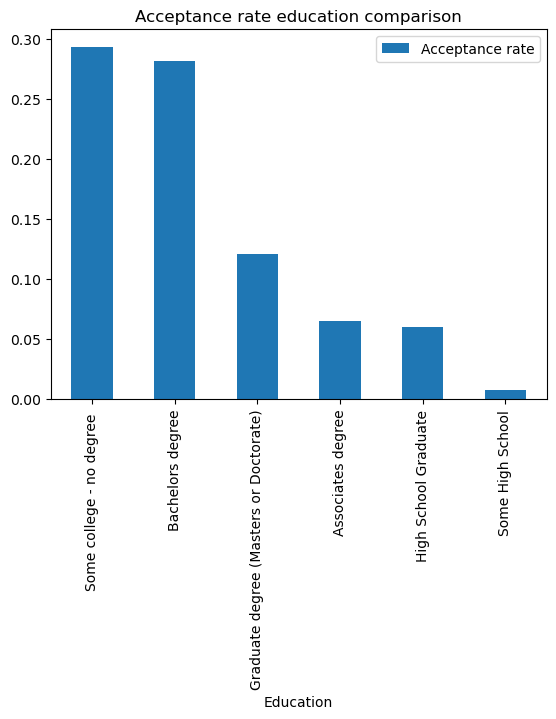

In [386]:
#RestaurantLessThan20 and education 

e1=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "Some college - no degree"')
lenge1=len(e1)
e2=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="Some college - no degree"')
lenge2=len(e2)
e3=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="Some college - no degree"')
lenge3=len(e3)
coupons_accepted_e1=(lenge1+lenge2+lenge3)/6877

e4=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "Bachelors degree"')
lenge4=len(e4)
e5=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="Bachelors degree"')
lenge5=len(e5)
e6=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="Bachelors degree"')
lenge6=len(e6)
coupons_accepted_e2=(lenge4+lenge5+lenge6)/6877

e7=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "Graduate degree (Masters or Doctorate)"')
lenge7=len(e7)
e8=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="Graduate degree (Masters or Doctorate)"')
lenge8=len(e8)
e9=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="Graduate degree (Masters or Doctorate)"')
lenge9=len(e9)
coupons_accepted_e3=(lenge7+lenge8+lenge9)/6877

e10=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "Associates degree"')
lenge10=len(e10)
e11=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education== "Associates degree"')
lenge11=len(e11)
e12=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education== "Associates degree"')
lenge12=len(e12)
coupons_accepted_e4=(lenge10+lenge11+lenge12)/6877

e13=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "High School Graduate"')
lenge13=len(e13)
e14=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="High School Graduate"')
lenge14=len(e14)
e15=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="High School Graduate"')
lenge15=len(e15)
coupons_accepted_e5=(lenge13+lenge14+lenge15)/6877

e16=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "Some High School"')
lenge16=len(e16)
e17=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="Some High School"')
lenge17=len(e17)
e18=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="Some High School"')
lenge18=len(e18)

coupons_accepted_e6=(lenge16+lenge17+lenge18)/6877


compare3=pd.DataFrame({
    'Education': ['Some college - no degree ', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'Associates degree', 'High School Graduate', 'Some High School'],
    'Acceptance rate': [coupons_accepted_e1, coupons_accepted_e2, coupons_accepted_e3, coupons_accepted_e4, coupons_accepted_e5, coupons_accepted_e6]})

compare3.plot(x="Education", y="Acceptance rate", kind="bar", title="Acceptance rate education comparison")



6. Inspect the Education column

In [370]:
data['income'].value_counts()

$25000 - $37499     1919
$12500 - $24999     1728
$100000 or More     1692
$37500 - $49999     1689
$50000 - $62499     1565
Less than $12500    1014
$62500 - $74999      840
$87500 - $99999      818
$75000 - $87499      814
Name: income, dtype: int64

7. Compare the coupon acceptance rate based on the income level of the customer

<Axes: title={'center': 'Acceptance rate income comparison'}, xlabel='income'>

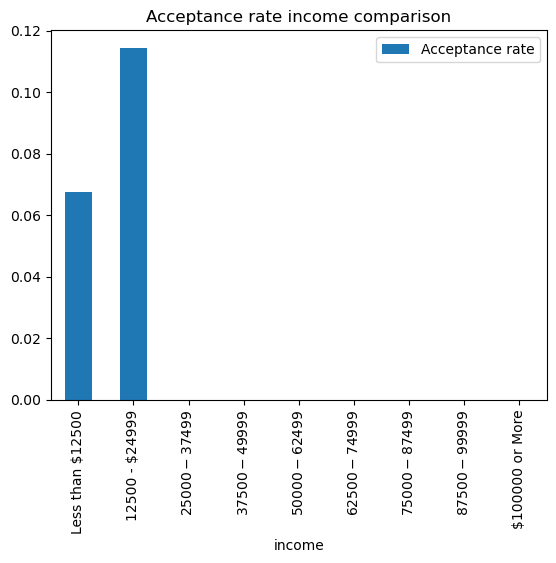

In [385]:
#RestaurantLessThan20 and anual income

i1=data.query('RestaurantLessThan20 == "1~3" and Y==1 and income== "Less than $12500"')
lengi1=len(i1)
i2=data.query('RestaurantLessThan20 == "4~8" and Y==1 and income=="Less than $12500"')
lengi2=len(i2)
i3=data.query('RestaurantLessThan20 == "gt8" and Y==1 and income=="Less than $12500"')
lengi3=len(i3)
coupons_accepted_i1=(lengi1+lengi2+lengi3)/6877

i4=data.query('RestaurantLessThan20 == "1~3" and Y==1 and income== "$12500 - $24999"')
lengi4=len(i4)
i5=data.query('RestaurantLessThan20 == "4~8" and Y==1 and income=="$12500 - $24999"')
lengi5=len(i5)
i6=data.query('RestaurantLessThan20 == "gt8" and Y==1 and income=="$12500 - $24999"')
lengi6=len(i6)
coupons_accepted_i2=(lengi4+lengi5+lengi6)/6877

i7=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$25000 - $37499"')
lengi7=len(i7)
i8=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="$25000 - $37499"')
lengi8=len(i8)
i9=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="$25000 - $37499"')
lengi9=len(i9)
coupons_accepted_i3=(lengi7+lengi8+lengi9)/6877

i10=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$37500 - $49999"')
lengi10=len(i10)
i11=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education== "$37500 - $49999"')
lengi11=len(i11)
i12=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education== "$37500 - $49999"')
lengi12=len(i12)
coupons_accepted_i4=(lengi10+lengi11+lengi12)/6877

i13=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$50000 - $62499"')
lengi13=len(i13)
i14=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="$50000 - $62499"')
lengi14=len(i14)
i15=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="$50000 - $62499"')
lengi15=len(i15)
coupons_accepted_i5=(lengi13+lengi14+lengi15)/6877

i16=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$62500 - $74999"')
lengi16=len(i16)
i17=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="$62500 - $74999"')
lengi17=len(i17)
i18=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="$62500 - $74999"')
lengi18=len(i18)

coupons_accepted_i6=(lengi16+lengi17+lengi18)/6877

i19=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$75000 - $87499"')
lengi19=len(i19)
i20=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="$75000 - $87499"')
lengi20=len(i20)
i21=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="$75000 - $87499"')
lengi21=len(i21)

coupons_accepted_i7=(lengi19+lengi20+lengi21)/6877

i22=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$87500 - $99999"')
lengi22=len(i22)
i23=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="$87500 - $99999"')
lengi23=len(i23)
i24=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="$87500 - $99999"')
lengi24=len(i24)

coupons_accepted_i8=(lengi22+lengi23+lengi24)/6877

i25=data.query('RestaurantLessThan20 == "1~3" and Y==1 and education== "$100000 or More"')
lengi25=len(i25)
i26=data.query('RestaurantLessThan20 == "4~8" and Y==1 and education=="$100000 or More"')
lengi26=len(i26)
i27=data.query('RestaurantLessThan20 == "gt8" and Y==1 and education=="$100000 or More"')
lengi27=len(i27)

coupons_accepted_i9=(lengi25+lengi26+lengi27)/6877


compare4=pd.DataFrame({
    'income': ['Less than $12500', '12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999','$75000 - $87499','$87500 - $99999', '$100000 or More'],
    'Acceptance rate': [coupons_accepted_i1,coupons_accepted_i2,coupons_accepted_i3,coupons_accepted_i4,coupons_accepted_i5,coupons_accepted_i6,coupons_accepted_i7,coupons_accepted_i8,coupons_accepted_i9]})

compare4.plot(x="income", y="Acceptance rate", kind="bar", title="Acceptance rate income comparison")


### Findings

From the results, there are a few things that can be said. First, the acceptance rate is considerably higher for those customers who travel alone than those who have companions such as friends or kids. This might be because the decision of accepting the coupon is entirely a personal decision (there is no external influence). 

Furthermore, a lower education level such as a high school graduate tends to have a lower acceptance rate than a customer with a higher education level such as a bachelor's degree. This is crucial information in order to detect potential customers and the target audience. 

Lastly, the income level plot shows some interesting results. The entire proportion of customers accepting the coupon lies within two levels: "Less than 12500" and between  " 12500 and 24999". This information makes sense, since lower income customers will see the coupon as a great opportunity and are more likely to accept it. 

For next steps and recommendations, I would say that a further analysis of all the coupon groups is necessary. It would be important to analyze all the variables such as income and education in all the coupon groups, in order to identify common trends and to potentialize coupon acceptance strategies.
